# # 线性回归模型与诊断
# 数据说明：本数据是一份汽车贷款数据

# |字段名|中文含义|
# |:--:|:--:|
# |id|id|
# |Acc|是否开卡(1=已开通)|
# |avg_exp|月均信用卡支出（元）|
# |avg_exp_ln|月均信用卡支出的自然对数|
# |gender|性别(男=1)|
# |Age|年龄|
# |Income|年收入（万元）|
# |Ownrent|是否自有住房（有=1；无=0)|
# |Selfempl|是否自谋职业(1=yes, 0=no)|
# |dist_home_val|所住小区房屋均价(万元)|
# |dist_avg_income|当地人均收入|
# |high_avg|高出当地平均收入|
# |edu_class|教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3|

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# 导入数据
raw = pd.read_csv(r"creditcard_exp.csv",skipinitialspace=True) #忽略分隔符后的空格
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [3]:
exp = raw[raw["avg_exp"].notnull()].copy().iloc[:,2:].drop("age2",axis=1)
exp.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3


In [4]:
exp_new = raw[raw["avg_exp"].isnull()].copy().iloc[:,2:].drop("age2",axis=1)
exp_new.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
2,NaN,NaN,1,36,8.40,0,0,88.61,7.49,0.91,1
11,NaN,NaN,1,22,5.10,0,0,109.07,4.78,0.32,1
13,NaN,NaN,0,27,4.90,0,1,53.93,5.43,-0.53,1
19,NaN,NaN,0,41,4.39,0,1,97.06,4.65,-0.26,1
20,NaN,NaN,1,54,4.18,0,0,10.01,4.59,-0.41,0


In [5]:
exp.describe(include="all")

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


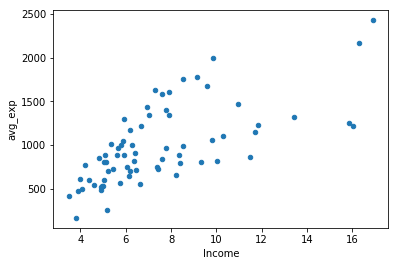

In [6]:
# 相关性分析
exp.plot('Income', 'avg_exp', kind='scatter')
plt.show()

In [7]:
# 确定自变量和因变量之间是否存在线性关系
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


income 和 avg_exp相关性较高，用于建模

In [8]:
# 一元线性回归
lm_s = ols('avg_exp ~ Income', data=exp).fit()
print(lm_s.params)

Intercept    258.049498
Income        97.728578
dtype: float64


### 回归公式为：<br> $Y=258.05 + 97.73x + \varepsilon$

In [9]:
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.60e-10
Time:                        21:13:46   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# 使用线性回归模型在训练集上进行预测和计算残差
pd.DataFrame([lm_s.predict(exp),lm_s.resid],index=['predict','resid']).T.head()

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [11]:
# 验证预测效果
lm_s.predict(exp_new)[:5]

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

# <b>多元线性模型</b>

In [12]:
lm_m = ols('avg_exp ~ Age + Income + dist_home_val + dist_avg_income',data=exp).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     19.20
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.82e-10
Time:                        21:13:46   Log-Likelihood:                -498.59
No. Observations:                  70   AIC:                             1007.
Df Residuals:                      65   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -32.0078    186.874     -0.171      0.865    -405.221     341.206
Age                 1.3723      5.605      0.245      0.807      -9.822      12.566
Income           -166.7204     87.607     -1.903      0.061    -341.684       8.243
dist_home_val       1.5329      1.057      1.450      0.152      -0.578       3.644
dist_avg_income   261.8827     87.807      2.982      0.004      86.521     437.245
==============================================================================
Omnibus:                        5.234   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.174
Skew:                           0.625   Prob(JB):                       0.0752
Kurtosis:                       2.540   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

  # 多元线性回归变量筛选

In [13]:
'''forward select'''
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)

In [14]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 'dist_avg_income']]
lm_m = forward_select(data=data_for_select, response='avg_exp')
print(lm_m.rsquared)

aic is 1007.6801413968117,continuing!
aic is 1005.4969816306302,continuing!
aic is 1005.2487355956046,continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income + Income + dist_home_val 
0.541151292841195


# 残差分析

1.残差不能与自变量相关（不能检验）

2.残差独立同分布

3.残差方差齐性

In [15]:
ana1 = lm_s

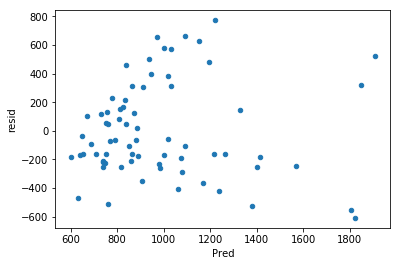

In [16]:
exp['Pred'] = ana1.predict(exp)
exp['resid'] = ana1.resid
exp.plot('Pred', 'resid',kind='scatter')
plt.show()

##### 随预测值增大，残差基本保持上下对称，但残差正负的幅度有逐渐变化的趋势，即模型方差不齐

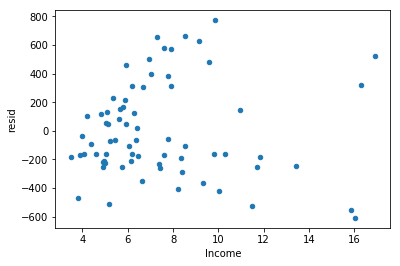

In [17]:
ana2 = ols("avg_exp_ln ~ Income",exp).fit()
exp['Pred'] = ana2.predict(exp)
exp['redid'] = ana2.resid
exp.plot('Income','resid',kind='scatter')
plt.show()

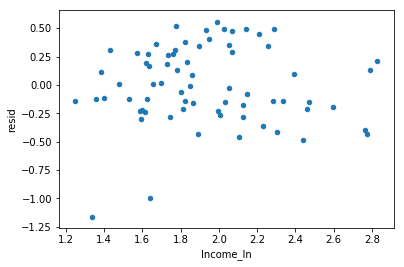

In [18]:
# 取对数可以抑制方差不齐
exp['Income_ln'] = np.log(exp['Income'])
ana3 = ols('avg_exp_ln ~ Income_ln', exp).fit()
exp['Pred'] = ana3.predict(exp)
exp['resid'] = ana3.resid
exp.plot('Income_ln', 'resid',kind='scatter')
plt.show()

In [19]:
# 对比结果
r_sq = {'exp~Income':ana1.rsquared, 'ln(exp)~Income':ana2.rsquared, 'ln(exp)~ln(Income)':ana3.rsquared}
print(r_sq)

{'exp~Income': 0.45429062315565294, 'ln(exp)~Income': 0.4030855555329651, 'ln(exp)~ln(Income)': 0.48039279938931057}


对收入和支出都取对数时，$R^2$最大

In [20]:
ana3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     62.87
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           2.95e-11
Time:                        21:13:47   Log-Likelihood:                -23.950
No. Observations:                  70   AIC:                             51.90
Df Residuals:                      68   BIC:                             56.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0611      0.222     22.833      0.000       4.619       5.503
Income_ln      0.8932      0.113      7.929      0.000       0.668       1.118
==============================================================================
Omnibus:                        8.382   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.074
Skew:                          -0.668   Prob(JB):                       0.0177
Kurtosis:                       3.992   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

验证残差自相关性，DW检验，接近2证明无自相关性

### 强影响点分析（离群值）
一元线性回归：散点图<br>
多元线性回归：预测值-学生化残差图（SR）,<br>
指标准化后的残差，当<br>
样本量为几百时：大于2为强影响点<br>
样本量为上千时：大于3为强影响点<br>

In [21]:
exp['resid_t'] = (exp['resid'] - exp['resid'].mean()) / exp['resid'].std()
exp[abs(exp['resid_t']) > 2]

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,Pred,resid,redid,Income_ln,resid_t
73,251.56,5.527682,0,29,5.1578,0,0,63.23,5.492947,-0.335147,0,6.526331,-0.998649,-1.037516,1.640510,-2.910292
98,163.18,5.094854,0,22,3.8159,0,0,63.27,3.997789,-0.181889,0,6.257191,-1.162337,-1.338582,1.339177,-3.387317


两条信息，说明他们是消费行为较特殊的样本，删除后再看

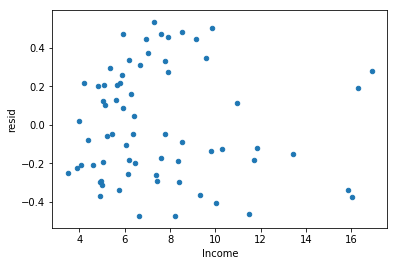

In [22]:
exp2 = exp[abs(exp['resid_t']) <= 2].copy()
ana4 = ols('avg_exp_ln ~ Income_ln', exp2).fit()
exp2['Pred'] = ana4.predict(exp2)
exp2['resid'] = ana4.resid
exp2.plot('Income', 'resid', kind='scatter')
plt.show()

In [23]:
r_sq1 = {'exp~Income':ana1.rsquared, 'ln(exp)~Income':ana2.rsquared, 'ln(exp)~ln(Income)':ana3.rsquared,"ana4":ana4.rsquared}
print(r_sq1)

{'exp~Income': 0.45429062315565294, 'ana4': 0.49397191385172456, 'ln(exp)~Income': 0.4030855555329651, 'ln(exp)~ln(Income)': 0.48039279938931057}


## 多重共线性

是线性回归的死敌，减轻的办法有：方差膨胀因子，特征根，条件指数，无截距的多重共线性分析

# 膨胀因子
 $$VIF_i =  \frac{1}{1-R^2_i}$$

In [24]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [27]:
exp2['dist_home_val_ln'] = np.log(exp2['dist_home_val'])
exp2['dist_avg_income_ln'] = np.log(exp2['dist_avg_income'])

In [28]:
ana5 = ols('''avg_exp_ln ~ Age + Income_ln + 
           dist_home_val_ln + dist_avg_income_ln''', exp2).fit()
ana5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.79e-10
Time:                        21:21:44   Log-Likelihood:                -7.3496
No. Observations:                  68   AIC:                             24.70
Df Residuals:                      63   BIC:                             35.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6265      0.317     14.574      0.000       3.992       5.261
Age                   -0.0006      0.005     -0.117      0.907      -0.011       0.010
Income_ln             -0.1802      0.569     -0.317      0.752      -1.317       0.957
dist_home_val_ln       0.1258      0.058      2.160      0.035       0.009       0.242
dist_avg_income_ln     1.0093      0.612      1.649      0.104      -0.214       2.233
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.466
Skew:                           0.248   Prob(JB):                        0.291
Kurtosis:                       2.210   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
r_sq1 = {
    'ana1':ana1.rsquared, 
    'ana2':ana2.rsquared, 
    'ana3':ana3.rsquared,
    "ana4":ana4.rsquared,
    "ana5":ana5.rsquared
}
print(r_sq1)

{'ana5': 0.5529068646270383, 'ana4': 0.49397191385172456, 'ana1': 0.45429062315565294, 'ana3': 0.48039279938931057, 'ana2': 0.4030855555329651}


In [31]:
# 参数估计的标准误差
ana5.bse 

Intercept             0.317453
Age                   0.005124
Income_ln             0.568848
dist_home_val_ln      0.058210
dist_avg_income_ln    0.612197
dtype: float64

exog = exp2[['Income_ln', 'dist_home_val_ln','dist_avg_income_ln']]

In [26]:
exp2.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,Pred,resid,redid,Income_ln,resid_t
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3,7.477774,-0.373605,-0.529085,2.774783,-1.268422
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2,7.468587,-0.336489,-0.482730,2.763012,-1.156390
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3,7.216497,-0.463561,-0.432342,2.439983,-1.420551
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2,7.338203,-0.151430,-0.188632,2.595937,-0.562182
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3,7.111621,-0.407170,-0.339167,2.305596,-1.212052


In [32]:
exog = exp2[['Income_ln', 'dist_home_val_ln','dist_avg_income_ln']]

In [33]:
for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

Income_ln 	 36.653639058963186
dist_home_val_ln 	 1.053596313570258
dist_avg_income_ln 	 36.894876856102


可见Income_ln 与 dist_avg_income_ln 的方差膨胀因子都大于10，存在多重共线性<br>
Income_ln与dist_avg_income_ln具有共线性，使用“高出平均收入的比率”代替其中一个<br>

In [34]:
exp2['high_avg_ratio'] = exp2['high_avg'] / exp2['dist_avg_income']

In [35]:
exog1 = exp2[['high_avg_ratio', 'dist_home_val_ln','dist_avg_income_ln']]

for i in exog1.columns:
    print(i, '\t', vif(df=exog1, col_i=i))

high_avg_ratio 	 1.1230220802048871
dist_home_val_ln 	 1.0527009887483532
dist_avg_income_ln 	 1.1762825351755393


In [36]:
var_select = exp2[['avg_exp_ln', 'high_avg_ratio', 
                   'dist_home_val_ln', 'dist_avg_income_ln']]
ana7 = forward_select(data=var_select, response='avg_exp_ln')
print(ana7.rsquared)

aic is 23.816793700737392,continuing!
aic is 20.830952279560805,continuing!
forward selection over!
final formula is avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln 
0.552039773684598


In [37]:
formula8 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(gender) + C(Ownrent) + C(Selfempl) + C(edu_class)
'''
ana8 = ols(formula8, exp2).fit()
ana8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.71
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.75e-24
Time:                        22:11:23   Log-Likelihood:                 35.337
No. Observations:                  68   AIC:                            -54.67
Df Residuals:                      60   BIC:                            -36.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5520      0.212     21.471      0.000       4.128       4.976
C(gender)[T.1]        -0.4301      0.060     -7.200      0.000      -0.550      -0.311
C(Ownrent)[T.1]        0.0184      0.045      0.413      0.681      -0.071       0.107
C(Selfempl)[T.1]      -0.3805      0.119     -3.210      0.002      -0.618      -0.143
C(edu_class)[T.2]      0.2895      0.051      5.658      0.000       0.187       0.392
C(edu_class)[T.3]      0.4686      0.060      7.867      0.000       0.349       0.588
dist_avg_income_ln     0.9563      0.098      9.722      0.000       0.760       1.153
dist_home_val_ln       0.0522      0.034      1.518      0.134      -0.017       0.121
==============================================================================
Omnibus:                        3.788   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.142
Skew:                           0.020   Prob(JB):                        0.126
Kurtosis:                       4.208   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
formula9 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(Selfempl) + C(gender):C(edu_class)
'''
ana9 = ols(formula9, exp2).fit()
ana9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     78.50
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.42e-28
Time:                        22:11:43   Log-Likelihood:                 48.743
No. Observations:                  68   AIC:                            -79.49
Df Residuals:                      59   BIC:                            -59.51
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          4.4098      0.178     24.839      0.000       4.055       4.765
C(Selfempl)[T.1]                  -0.2945      0.101     -2.908      0.005      -0.497      -0.092
C(edu_class)[T.2]                  0.3164      0.045      7.012      0.000       0.226       0.407
C(edu_class)[T.3]                  0.5576      0.054     10.268      0.000       0.449       0.666
C(gender)[T.1]:C(edu_class)[1]    -0.0054      0.098     -0.055      0.956      -0.201       0.190
C(gender)[T.1]:C(edu_class)[2]    -0.4357      0.068     -6.374      0.000      -0.573      -0.299
C(gender)[T.1]:C(edu_class)[3]    -0.6001      0.065     -9.230      0.000      -0.730      -0.470
dist_avg_income_ln                 0.9893      0.078     12.700      0.000       0.833       1.145
dist_home_val_ln                   0.0654      0.029      2.278      0.026       0.008       0.123
==============================================================================
Omnibus:                        5.023   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.070
Skew:                          -0.328   Prob(JB):                       0.0793
Kurtosis:                       4.166   Cond. No.                         61.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
r_sq1 = {
    'ana1':ana1.rsquared, 
    'ana2':ana2.rsquared, 
    'ana3':ana3.rsquared,
    "ana4":ana4.rsquared,
    "ana5":ana5.rsquared,
    "ana7":ana7.rsquared,
    "ana8":ana8.rsquared,
    "ana9":ana9.rsquared,
}
print(r_sq1)

{'ana5': 0.5529068646270383, 'ana4': 0.49397191385172456, 'ana3': 0.48039279938931057, 'ana2': 0.4030855555329651, 'ana7': 0.552039773684598, 'ana9': 0.9141173023186714, 'ana1': 0.45429062315565294, 'ana8': 0.8726053435196846}


# 小结

步骤：

1、在模型设置时，选择何种回归方法，如何选变量，以及变量以何种形式放入模型（根据理论，看散点图）

2、自变量与扰动项不能相关（根据理论或常识判断，无法检验）

3、自变量之间不能强线性相关（膨胀系数）

4、扰动项独立同分布（异方差检验，DW检验）

5、扰动项服从正态分布（QQ检验）

### 建模流程

1.初始分析

2.变量选择

3.验证模型假定

4.多重共线性与强影响点的诊断与分析

5.模型是否有问题

6.预测和解释

In [41]:
lmr = ols('avg_exp ~ Income + dist_home_val + dist_avg_income',
          data=exp).fit_regularized(alpha=1, L1_wt=0)

In [42]:
lmr.summary()

In [ ]:
.
.
l
\l
3

.